In [7]:
RANDOM_STATE = 42

In [1]:
import numpy as np
import seaborn as sns
from sklearn.datasets import load_diabetes

from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
)

sns.set(font_scale=1.3)

## Линейная регрессия

Рассмотрим данные `load_diabetes` из библиотеки `scikit-learn`, которые были созданы для изучения прогрессирования диабета у пациентов на основании медицинских показателей. Идея заключается в использовании десяти базовых физиологических параметров, таких как возраст, индекс массы тела (BMI), среднее артериальное давление и показатели анализа крови, чтобы предсказать, как будет развиваться заболевание через год после начального обследования.

Этот набор данных стал популярным в машинном обучении для тестирования и сравнения методов регрессии, так как он представляет собой реальные данные, стандартизированные для удобства использования. Изначально данные были собраны и проанализированы в рамках исследования, предложенного Брэдли Эфроном и его коллегами в 2004 году.

### 1. Загрузка данных

In [2]:
data = load_diabetes()
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

Функция `sklearn.datasets.load_diabetes()` возвращает словарь. В поле `data` записана матрица регрессоров, в которой данные предварительно центрированы и нормированы. В поле `target` записана мера прогрессирования заболевания в течение года. В поле `DESCR` можно прочитать подробнее о данных.

Посмотрим на описание датасета.

In [3]:
print(data["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

Поле `data` содержит матрицу размера 442 $\times$ 10, где 442 &mdash; количество пациентов, а 10 &mdash; количество признаков (возраст, пол, и т.д.).

In [4]:
data["data"].shape

(442, 10)

Целевая метка &mdash; мера прогрессирования заболевания в течение года.

In [5]:
data["target"].shape

(442,)

Создайте матрицу регрессоров $X$ (data) и столбец наблюдений $Y$ (целевая переменная).

In [6]:
X, Y = data['data'], data['target']

### 2. Обучение моделей

Разбейте данные случайно на две части &mdash; обучающую и тестовую в соотношении 80:20. Для этого используйте функцию [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

При разбиении датасета стоит зафиксировать случайность для воспроизводимости результатов, зафиксировав `random_state=42` в функции разбиения (глобально можно ставить любое число, необязательно именно 42).

Для этого создайте переменную `RANDOM_STATE = 42` в начале ноутбука и присвойте ее значение аргументу `random_state`.

In [9]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=RANDOM_STATE, train_size=0.8)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(353, 10) (89, 10) (353,) (89,)


Создайте модель линейной регрессии из `sklearn` и обучите ее на обучающей части данных.

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Посмотрите на результат обучения. Выведите коэффициенты перед признаками и свободный коэффициент.

In [24]:
print(f'Коэффициенты наклона прямой:{model.coef_}, коэффициент сдвига:{model.intercept_}')

Коэффициенты наклона прямой:[  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743], коэффициент сдвига:151.34560453985995


Выполните предсказание модели на тестовой выборке и выведите получившиеся значения.

In [28]:
from sklearn.metrics import accuracy_score

In [33]:
y_pred = model.predict(X_test)
print(y_pred.round(2))

[139.55 179.52 134.04 291.42 123.79  92.17 258.23 181.34  90.22 108.63
  94.14 168.43  53.5  206.63 100.13 130.67 219.53 250.78 196.37 218.58
 207.35  88.48  70.43 188.96 154.89 159.36 188.31 180.39  47.99 108.97
 174.78  86.36 132.96 184.54 173.83 190.36 124.42 119.65 147.95  59.05
  71.62 107.68 165.45 155.01 171.05  61.46  71.67 114.97  51.58 167.58
 152.52  62.96 103.5  109.21 175.64 154.6   94.42 210.74 120.26  77.62
 187.93 206.49 140.63 105.6  130.7  202.19 171.13 164.91 124.72 144.81
 182.   199.41 234.21 145.96  79.87 157.37 192.74 208.9  158.59 206.02
 107.48 140.94  54.82  55.93 115.01  78.96  81.56  54.38 166.25]


Реализуйте метрики **MSE**, **MAE**, **MAPE** без использования `sklearn` и других готовых реализаций.

Пусть $Y_1, ..., Y_n$ &mdash; истинные значения, а $\widehat{Y}_1, ..., \widehat{Y}_n$ &mdash; предсказания.


Метрика **MSE** (*mean squared error*) определяется как
$$MSE = \frac{1}{n}\sum_{i=1}^n \left(Y_i - \widehat{Y}_i\right)^2.$$
\
Метрика **MAE** (*mean absolute error*) определяется как
$$MAE = \frac{1}{n}\sum_{i=1}^n \left|Y_i - \widehat{Y}_i\right|.$$
\
Метрика **MAPE** (*mean absolute percentage error*) определяется как
$$MAPE = \frac{1}{n}\sum_{i=1}^n \left|\frac{Y_i - \widehat{Y}_i}{Y_i}\right|.$$


In [37]:
def MSE(y_true, y_pred):
    return 1 / np.size(y_true) * np.sum((y_true - y_pred) ** 2)

def MAE(y_true, y_pred):
    return 1 / np.size(y_true) * np.sum(np.abs((y_true - y_pred)))

def MAPE(y_true, y_pred):
    return 1 / np.size(y_true) * np.sum(np.abs(y_true - y_pred)/y_true)

Сравните **MSE**, **MAE**, **MAPE** на тренировочной и тестовой выборках. Что вы можете сказать о полученных значениях?

In [38]:
y_pred_train = model.predict(X_train)

In [39]:
print(f"MSE_train = {round(MSE(y_train, y_pred_train), 3)}")
print(f"MSE_test = {round(MSE(y_test, y_pred), 3)}")

print(f"MAE_train = {round(MAE(y_train, y_pred_train), 3)}")
print(f"MAE_test = {round(MAE(y_test, y_pred), 3)}")

print(f"MAPE_train = {round(MAPE(y_train, y_pred_train), 3)}")
print(f"MAPE_test = {round(MAPE(y_test, y_pred), 3)}")

MSE_train = 2868.55
MSE_test = 2900.194
MAE_train = 43.484
MAE_test = 42.794
MAPE_train = 0.389
MAPE_test = 0.375


**Ответ:**  Все коэффициенты одного порядка, но могут отличаться в пределах погрешности

Также ниже вы можете увидеть эти же метрики, реализованные в `sklearn.metrics`, и сравнить результаты вычислений с ними.

In [40]:
metrics_to_check = [
    (MSE, mean_squared_error, "MSE"), # ваша реализация MSE, реализация из sklearn.metrics, название метрики
    (MAE, mean_absolute_error, "MAE"), # ваша реализация MAE, реализация из sklearn.metrics, название метрики
    (MAPE, mean_absolute_percentage_error, "MAPE"), # ваша реализация MAPE, реализация из sklearn.metrics, название метрики
]

for your_metrics, sklearn_metrics, name in metrics_to_check:
    assert (
        np.abs(your_metrics(y_test, y_pred) - sklearn_metrics(y_test, y_pred))
        < 1e-4
    ), f"Ошибка в реализации {name}"

### 3. Интерпретация результатов

Линейные модели являются одними из самых интерпретируемых, так как мы можем получить коэффициент каждого из признаков и рассматривать его как изменение значения таргета при изменении значения признака на единицу (когда все остальные признаки неизменны). Мы легко и четко понимаем, как ведут себя предсказания модели.

***Чтобы коэффициенты разных признаков можно было сравнивать между собой, необходимо признаки привести к одному масштабу, что чаще всего делается с помощью нормализации (вычитаем среднее и делим на стандартное отклонение).***

Проверьте, что в нашем датасете все признаки уже имеют одинаковое среднее и дисперсию.

In [42]:
print(X.shape)

(442, 10)


In [49]:
for i in range(X.shape[1]):
    print(f'Среднее для данных в {i+1}-й колонке: {np.mean(X[:, i]).round(3)}, \n'
          f'Дисперсия для данных в {i+1}-й колонке: {np.var(X[:, i]).round(3)}, \n')

Среднее для данных в 1-й колонке: -0.0, 
Дисперсия для данных в 1-й колонке: 0.002, 

Среднее для данных в 2-й колонке: 0.0, 
Дисперсия для данных в 2-й колонке: 0.002, 

Среднее для данных в 3-й колонке: -0.0, 
Дисперсия для данных в 3-й колонке: 0.002, 

Среднее для данных в 4-й колонке: -0.0, 
Дисперсия для данных в 4-й колонке: 0.002, 

Среднее для данных в 5-й колонке: -0.0, 
Дисперсия для данных в 5-й колонке: 0.002, 

Среднее для данных в 6-й колонке: 0.0, 
Дисперсия для данных в 6-й колонке: 0.002, 

Среднее для данных в 7-й колонке: -0.0, 
Дисперсия для данных в 7-й колонке: 0.002, 

Среднее для данных в 8-й колонке: -0.0, 
Дисперсия для данных в 8-й колонке: 0.002, 

Среднее для данных в 9-й колонке: 0.0, 
Дисперсия для данных в 9-й колонке: 0.002, 

Среднее для данных в 10-й колонке: 0.0, 
Дисперсия для данных в 10-й колонке: 0.002, 



Запишите в переменную `feature_names` массив из названий признаков, а в `coefficients` коэффициенты обученной модели и посмотрите на графиках, как соотносятся получившиеся значения коэффициентов для разных признаков.

In [54]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

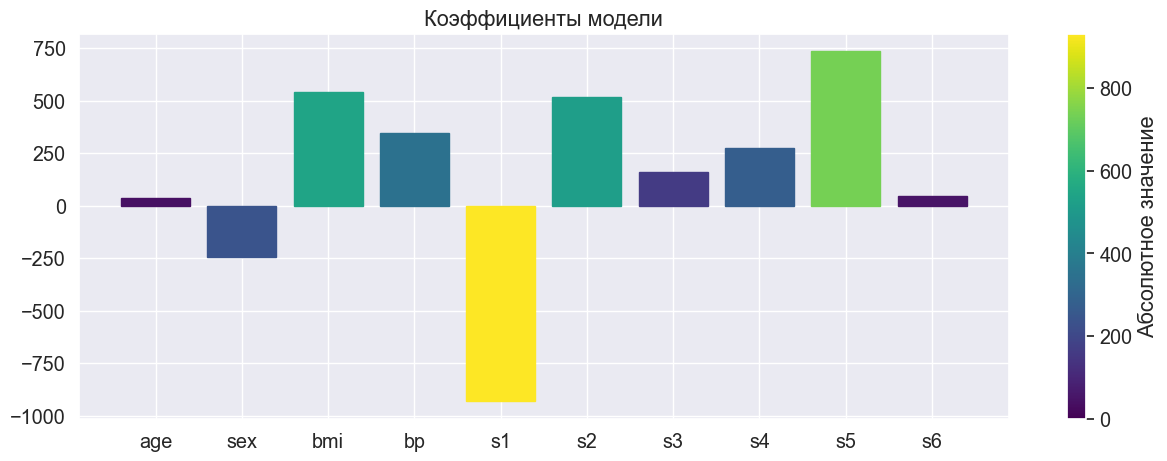

In [56]:
feature_names = data['feature_names']
coefficients = model.coef_

fig, ax = plt.subplots(figsize=(15, 5))
bars = plt.bar(feature_names, coefficients)

norm = mcolors.Normalize(vmin=0, vmax=max(abs(coefficients)))
cmap = plt.cm.viridis

for bar, value in zip(bars, coefficients):
    bar.set_color(cmap(norm(abs(value))))

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Абсолютное значение')

ax.set_title('Коэффициенты модели');


Прочитайте описание признаков из датасета и интерпретируйте полученные коэффициенты модели.

In [53]:
print(data["DESCR"].split("baseline\n\n")[-1].split("\n\nNote")[0])

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level


**Вывод:** От возраста, s3 и s6 прогрессирование заболевания за год практически не зависит. Более важными являются пол, bp, s4. Ещё важнее bmi и s2.  Наиболее важным является s1.